<a href="https://colab.research.google.com/github/Mia-Tay/collab_bubble_tea/blob/main/BBT_feature_selection_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
     import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
bbt_folder= 'drive/My Drive/bubble_tea/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option("display.expand_frame_repr", False)

Converting data set to classification question

In [ ]:
bubble = pd.read_csv(bbt_folder + 'table.csv')
bubble.loc[bubble['Qty'] > 0, 'Qty'] = 1
y = bubble['Qty']
bubble.drop(['Qty','Unnamed: 0'] , axis = 1 , inplace = True)

Normalize data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bubble_scaled = scaler.fit_transform(bubble)  #note: standardscaler.fit_transform() returns numpy array

#Converting np array back to df
bubble_scaled = pd.DataFrame(bubble_scaled, columns = bubble.columns)
print('shape',bubble_scaled.shape)
print(bubble_scaled.head())


shape (140, 585)
   Population, 2016  Population, 2011  Population Change 2011-2016  Total private dwellings  Private dwellings occupied by usual residents  Population density per square kilometre  Land area in square kilometres  Children (0-14 years)  Youth (15-24 years)  Working Age (25-54 years)  Pre-retirement (55-64 years)  Seniors (65+ years)  Older Seniors (85+ years)  Male: 0 to 04 years  Male: 05 to 09 years  Male: 10 to 14 years  Male: 15 to 19 years  Male: 20 to 24 years  Male: 25 to 29 years  Male: 30 to 34 years  Male: 35 to 39 years  Male: 40 to 44 years  Male: 45 to 49 years  Male: 50 to 54 years  Male: 55 to 59 years  Male: 60 to 64 years  Male: 65 to 69 years  Male: 70 to 74 years  Male: 75 to 79 years  Female: 10 to 14 years  Male: 80 to 84 years  Male: 85 to 89 years  Male: 90 to 94 years  Male: 95 to 99 years  Male: 100 years and over  Female: 0 to 04 years  Female: 05 to 09 years  Female: 15 to 19 years  Female: 20 to 24 years  Female: 25 to 29 years  Female: 30 to

Checking feature importance with Logistic regression

<class 'list'>


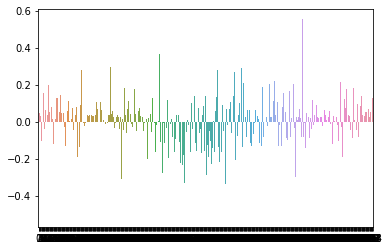

coefs <class 'dict'> dict_values([0.048415244330320704, 0.047493788087846774, 0.060683771121849216, 0.03043956667622721, 0.025390804613278143, 0.10653676884865117, 0.09171657241741689, 0.04406751834840434, 0.15690918551074762, 0.06814218540352009, 0.04148521793130321, 0.084283645326702, 0.062190304766498984, 0.11770456740731707, 0.05655930324807743, 0.035267631846778, 0.13743760238204664, 0.19741020356636185, 0.055289400211981976, 0.051725433117420165, 0.07993201500206892, 0.09076469903695254, 0.08011707194242833, 0.08822527652981776, 0.015145139209480728, 0.03367828683895991, 0.11966733711089084, 0.19913115328947323, 0.10390290484382252, 0.015624129006938213, 0.05078444038086216, 0.12498326625847413, 0.017308635789480022, 0.12496086773219421, 0.040821388084773, 0.024503520361178838, 0.05122414315723976, 0.04941354734266606, 0.14338998810930256, 0.07588977408907457, 0.046185540501618653, 0.11370500138344636, 0.02894447299171401, 0.046451710097076104, 0.005972375149833832, 0.02820707496

In [ ]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
#split train/test sety
X_train, X_test, y_train, y_test = train_test_split(bubble_scaled,y,test_size=0.2, random_state=5)


#train model
lg_model = LogisticRegression(solver='liblinear')  #Mia L1 PANELTY
lg_model.fit(X_train,y_train)
lg_importance = lg_model.coef_[0]  #coef_ is of shape (1, n_features) when the given problem is binary. [[]] only one list in the list, so pick coef_[0]

#plot the importance

bar_x_axis = range(len(lg_importance))
print(type(list(bar_x_axis)))
sns.barplot(x=list(bar_x_axis),y=lg_importance)
plt.show()

#Sort feature importance
coefs = dict(zip(bubble_scaled.columns,abs(lg_model.coef_[0])))
print('coefs',type(coefs), coefs.values())
sorted_coefs = sorted(coefs.items(), key=lambda item: item[1])
print('sorted feature with their feature importance', sorted_coefs)

Use feature Selector to select features with coef above mean

In [ ]:
from sklearn.feature_selection import SelectFromModel

# selector = SelectFromModel(estimator=lg_model, threshold=2*'median')
selector = SelectFromModel(LogisticRegression(max_iter= 1000 ,solver='liblinear'), threshold='mean')
bubble_selected = selector.fit_transform(bubble_scaled,y) #note: return np array rather than df
print(bubble_selected.shape, type(bubble_selected))
#get 
selecte_columns = selector.get_support()
#convert ndarray to df
bubble_df_selected = bubble_scaled.loc[:,selecte_columns].copy()
print(bubble_df_selected.head())
print(bubble_df_selected.shape)

# print("We started with {0} features but retained only {1} of them!".format(bubble.shape[1] - 1, df_fs.shape[1]))


(140, 214) <class 'numpy.ndarray'>
   Population density per square kilometre  Land area in square kilometres  Youth (15-24 years)  Male: 0 to 04 years  Male: 15 to 19 years  Male: 20 to 24 years  Male: 65 to 69 years  Male: 70 to 74 years  Male: 85 to 89 years  Male: 95 to 99 years  Female: 20 to 24 years  Female: 25 to 29 years  Female: 35 to 39 years  Female: 60 to 64 years  Female: 65 to 69 years  Female: 70 to 74 years  Female: 75 to 79 years      Never married  Population age 65+ by family characteristics  Persons age 65+ living alone (total)  Persons age 85+ living alone (total)  Persons age 85+ living alone (per cent)  Single young adults (age 20-34) living at home (per cent)    Without total income    Percentage with total income      Under $10,000 (including loss)    Without after-tax income    Percentage with after-tax income      Under $10,000 (including loss).1    Percentage with employment income    Average after-tax income of households in 2015 ($)    Under $5,000    $40

In [ ]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(bubble_df_selected,y,test_size=0.2, random_state=5)
#Test with RFE Random Forest
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

#RFE with Random Forest 
rfe_rfT = RFE(estimator= RandomForestClassifier())
rfe_rfT.fit(X_train_0, y_train_0)
#get True/False on selection of each item
rf_maskT = rfe_rfT.support_

#check total # of selected items
print(f'From {len(rf_maskT)} items, use RFE RF, I got {rf_maskT.sum()} features selected')

#Check score
print('The score is ',rfe_rfT.score(X_test_0,y_test_0))
print('columns: ',bubble_df_selected.columns[rf_maskT])


From 214 items, use RFE RF, I got 107 features selected
The score is  0.7857142857142857
columns:  Index(['Population density per square kilometre',
       'Land area in square kilometres', 'Youth (15-24 years)',
       'Male: 0 to 04 years', 'Male: 15 to 19 years', 'Male: 20 to 24 years',
       'Male: 65 to 69 years', 'Male: 70 to 74 years', 'Male: 85 to 89 years',
       'Female: 20 to 24 years',
       ...
       '    College, CEGEP or other non-university certificate or diploma',
       '      Degree in medicine, dentistry, veterinary medicine or optometry',
       '      Earned doctorate', '      Master's degree.1',
       '    University certificate, diploma or degree at bachelor level or above.1',
       '      Degree in medicine, dentistry, veterinary medicine or optometry.1',
       '      Earned doctorate.1',
       '    5 Occupations in art, culture, recreation and sport',
       '    9 Occupations in manufacturing and utilities',
       '8 Peak Hr Pedestrian Volume'],
    

use RFE + Logistics Regression compare


In [ ]:
#RFE and Logistics Regression select Features
from sklearn.feature_selection import RFE

rfe_lr_initial = RFE(estimator= LogisticRegression(penalty='l1', random_state=5,solver='liblinear'))
rfe_lr_initial.fit(X_train_0, y_train_0)
lr_mask_initial =rfe_lr_initial.support_
rfe_lr_initial_df = bubble_df_selected.loc[:, lr_mask_initial]

print('total count of data set is ', len(lr_mask_initial))
print('Selected by RFE Logistics Regression is ', lr_mask_initial.sum())
print('Score is ', rfe_lr_initial.score(X_test_0,y_test_0))
print('test df', bubble_df_selected.columns[lr_mask_initial])





total count of data set is  214
Selected by RFE Logistics Regression is  107
Score is  0.75
test df Index(['Male: 20 to 24 years', 'Male: 65 to 69 years', 'Male: 70 to 74 years',
       'Male: 85 to 89 years', 'Male: 95 to 99 years',
       'Female: 20 to 24 years', 'Female: 25 to 29 years',
       'Female: 35 to 39 years', 'Female: 60 to 64 years',
       'Female: 65 to 69 years',
       ...
       '  1981 to 1990', ' New Zealander',
       '; Pacific Islands origins;; n.i.e.;', '  2006 to 2010',
       '  15 to 24 years', '  35 to 44 years', 'Rate of unaffordable housing',
       '      Earned doctorate.1',
       '    9 Occupations in manufacturing and utilities',
       '8 Peak Hr Pedestrian Volume'],
      dtype='object', length=107)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier # to test by Mia

rfe_gb = RFE(estimator=GradientBoostingClassifier())
rfe_gb.fit(X_train_0, y_train_0)
gb_mask = rfe_gb.support_
print(gb_mask)
print('GB selected ', gb_mask.sum())
print('test df', bubble_df_selected.columns[gb_mask])


[False  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True False  True  True  True  True  True
  True  True  True  True False  True  True  True False False  True False
  True False False False False False  True False False  True False  True
 False  True False False False False False False False  True False  True
  True False  True  True  True  True False False  True  True  True  True
  True  True False  True False False False  True  True False False False
 False  True False False  True False False False False  True False False
 False  True False False False False False  True  True  True  True False
  True False  True  True False False False  True  True False False False
 False False False False False False False  True  True False False False
 False False  True False False False False False False False False False
 False  True  True  True  True False  True False  True False  True False
 False False False  True  True False False  True  T

In [ ]:
#The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

#getting best ranked features by logistics regression
rfe_lr_rankingT = rfe_lr_initial.ranking_
lr_one = rfe_lr_initial.ranking_ ==1
print(bubble_df_selected.columns[lr_one])

#getting best ranked features by Random Forest
rfe_rfT_ranking = rfe_rfT.ranking_
one_rf = rfe_rfT_ranking ==1
print(bubble_df_selected.columns[one_rf])

#getting best ranked features by GrandientBoosting
rfe_gb_ranking = rfe_gb.ranking_
gb_one = rfe_gb_ranking ==1
print(len(bubble_df_selected.columns[gb_one]),bubble_df_selected.columns[gb_one])

#sum up vote
votes = np.sum([gb_one,one_rf, lr_one], axis=0)

#get features with votes >=2
final_columns = bubble_df_selected.columns[votes >=2]
print(final_columns)

data = bubble_df_selected.loc[:, final_columns]



Index(['Male: 20 to 24 years', 'Male: 65 to 69 years', 'Male: 70 to 74 years',
       'Male: 85 to 89 years', 'Male: 95 to 99 years',
       'Female: 20 to 24 years', 'Female: 25 to 29 years',
       'Female: 35 to 39 years', 'Female: 60 to 64 years',
       'Female: 65 to 69 years',
       ...
       '  1981 to 1990', ' New Zealander',
       '; Pacific Islands origins;; n.i.e.;', '  2006 to 2010',
       '  15 to 24 years', '  35 to 44 years', 'Rate of unaffordable housing',
       '      Earned doctorate.1',
       '    9 Occupations in manufacturing and utilities',
       '8 Peak Hr Pedestrian Volume'],
      dtype='object', length=107)
Index(['Population density per square kilometre',
       'Land area in square kilometres', 'Youth (15-24 years)',
       'Male: 0 to 04 years', 'Male: 15 to 19 years', 'Male: 20 to 24 years',
       'Male: 65 to 69 years', 'Male: 70 to 74 years', 'Male: 85 to 89 years',
       'Female: 20 to 24 years',
       ...
       '    College, CEGEP or other 

In [ ]:
#split train/test sety
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data,y,test_size=0.2, random_state=5)
logReg= LogisticRegression(solver='liblinear')
logReg.fit(X_train_1, y_train_1)
print('importances', logReg.coef_[0])


coefs_1 = dict(zip(data.columns,abs(logReg.coef_[0])))
print('coefs',type(coefs_1), coefs_1.values())
sorted_coefs_1 = sorted(coefs_1.items(), key=lambda item: item[1])
print('sorted feature with their feature importance', sorted_coefs_1)
print('score is ', logReg.score(X_test_1, y_test_1))

importances [ 2.91599663e-01  2.66620800e-01  2.51870111e-01  4.15413709e-01
  2.00094729e-01 -9.18558462e-02 -2.52035451e-01  5.74981114e-01
  2.59944479e-01  1.64496808e-01  7.98616333e-02  2.90108081e-01
 -6.09241027e-02 -4.00710894e-02  5.24717269e-02 -2.39741372e-01
  7.51209357e-02 -1.59184394e-01 -2.07356970e-01 -9.71606912e-02
 -3.88614565e-01  7.13288339e-01  3.66156871e-01 -5.29402778e-04
  1.45808439e-01  3.62719349e-01 -3.00736696e-02  1.48104168e-01
  9.88541186e-01 -4.91467158e-01  3.49270332e-01  2.06940790e-01
  3.62868102e-01 -4.01808322e-01 -7.75167046e-01 -3.60035243e-01
 -1.27451426e-01  2.13862107e-01  3.78713666e-01 -2.46943970e-01
 -2.45758998e-01  4.61657620e-01  6.58779623e-01 -4.07561342e-01
 -1.10563877e-01 -6.24160367e-01 -2.23475488e-01  2.63380804e-01
 -4.05596921e-01  3.08727305e-01 -4.51271585e-01 -1.11916761e+00
 -1.99608250e-01 -4.62975888e-01 -5.07584878e-01 -7.52708821e-01
  5.44544751e-01 -2.79772061e-01  1.82315746e-01  2.17078729e-01
  9.79326717e

In [ ]:
df= pd.read_csv(bbt_folder + 'table_new.csv')
shop_qty = df['Qty']
df_select = df.loc[:, final_columns]
df_select['Shop Qty']=shop_qty
df_select.head()
df_select.to_csv(f'{bbt_folder}data_0519.csv')

In [ ]:
print(df_select.head())


   Land area in square kilometres  Youth (15-24 years)  Male: 0 to 04 years  Male: 15 to 19 years  Male: 20 to 24 years  Male: 65 to 69 years  Male: 70 to 74 years  Male: 85 to 89 years  Male: 95 to 99 years  Female: 20 to 24 years  Female: 25 to 29 years  Female: 35 to 39 years  Female: 60 to 64 years  Female: 65 to 69 years  Female: 70 to 74 years  Female: 75 to 79 years      Never married  Population age 65+ by family characteristics  Persons age 65+ living alone (total)  Persons age 85+ living alone (total)  Persons age 85+ living alone (per cent)  Single young adults (age 20-34) living at home (per cent)    Without total income    Percentage with total income      Under $10,000 (including loss)    Without after-tax income    Percentage with after-tax income      Under $10,000 (including loss).1    Percentage with employment income    Average after-tax income of households in 2015 ($)    Under $5,000    $40,000 to $44,999    Under $5,000.1      $125,000 to $149,999.1   First Nation